In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

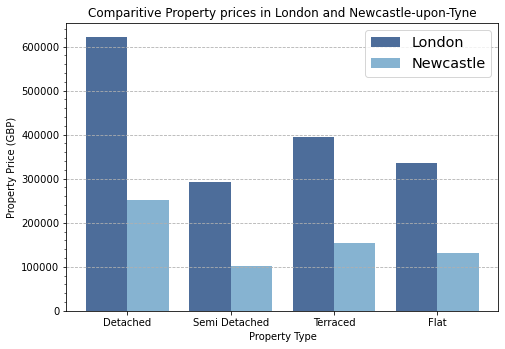

In [6]:
#importing data set, creating dataframe and dropping the 'Date' column as it is redundant for this plot
data = pd.read_csv("Property_Data/Average-prices-Property-Type-2021-05_wrangled.csv")
df = pd.DataFrame(data)
df.drop(['Date'], axis=1, inplace=True)

#splitting the dataframe so each region has its own dataframe, makes handling data a lot easier
dfLondon = df[df['Region_Name'] == 'London'].reset_index()
dfNewc = df[df['Region_Name'] == 'Newcastle upon Tyne'].reset_index()
dfNewc.drop(['Region_Name','index'], axis=1, inplace=True)

#
x_axis = dfNewc['propertyType'].unique()
y_axis = dfNewc.groupby('propertyType').mean()['averagePrice']
x_axisL = dfLondon['propertyType'].unique()
y_axisL = dfLondon.groupby('propertyType').mean()['averagePrice']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.title('test title')
plt.ylabel('Property Price (GBP)')
plt.xlabel('Property Type')

pL = ax.bar(x=x_axisL, height=y_axisL, width=-0.4, data=dfLondon, align='edge', label='London', color='#4d6d9a')
pN = ax.bar(x=x_axis, height=y_axis, width=0.4, data=dfNewc, align='edge', label='Newcastle', color='#86b3d1')

plt.title('Comparitive Property prices in London and Newcastle-upon-Tyne')
plt.ylabel('Property Price (GBP)')
plt.xlabel('Property Type')
plt.grid(axis='y', linestyle='--')
ax.legend(fontsize='x-large')
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Detached', 'Semi Detached', 'Terraced', 'Flat'])
plt.savefig('test.svg', bbox_inches='tight')



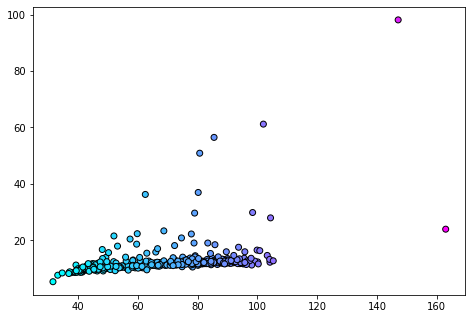

In [7]:
data = pd.read_csv("Broadband_Data/202006_fixed_laua_performance_wrangled.csv")
temp = pd.DataFrame(data)
df = temp[["laua_name", "averageDown", "averageUpload"]]

x_axis = df['averageDown']
y_axis = df['averageUpload']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pB = ax.scatter(x=x_axis, y=y_axis, c=x_axis, cmap="cool", edgecolors='black')

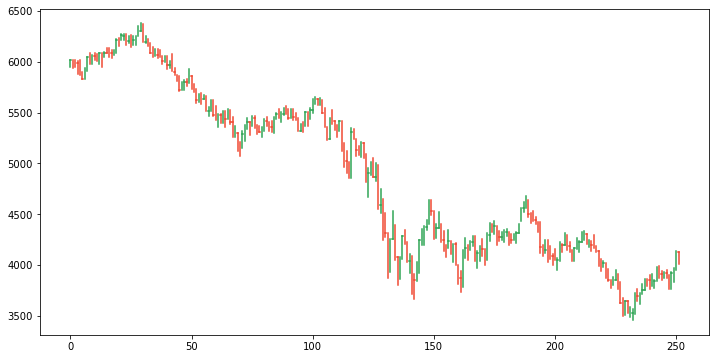

In [15]:
df = pd.read_csv("Financial_Data/ftse_data_wrangled.csv", index_col='date').loc['2008-04-06':'2009-04-05']
df.reset_index(inplace=True)

x = range(0, len(df))
fig, ax = plt.subplots(1, figsize=(12,6))

for i, val in df.iterrows():
    color = '#2CA453'
    if val['Open'] > val['Close']: color= '#F04730'
    plt.plot([x[i], x[i]], [val['Low'], val['High']], color=color)
    plt.plot([x[i], x[i]-0.1], [val['Open'], val['Open']], color=color)
    plt.plot([x[i], x[i]+0.1], [val['Close'], val['Close']], color=color)
    